In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def Per(X):
  "Compute the perimeter of a triangle"
  a=np.asarray(X)
  x,y,z=a[0],a[1],a[2]
  return (x + np.sqrt(y**2 + z**2) + np.sqrt((y - x)**2 + z**2))
def Rapport(x):
  "Compute the fraction Perimeter/Volume"
  a=np.asarray(x)
  x,y,z=a[0],a[1],a[2]
  return 2*((x +np.sqrt(y**2+z**2)+np.sqrt((y-x)**2+z**2)))**2/(x*z)

In [4]:
def Grad(X):
  "Compute in a closed form solution the gradient of the Rapport function"
  a = np.asarray(X)
  grad = np.zeros_like(a)
  x, y, z = a[0], a[1], a[2]
  grad[0] = (4 * ((x - y) / np.sqrt((x - y) ** 2 + z ** 2) + 1) * (np.sqrt((x - y) ** 2 + z ** 2) + x + np.sqrt(y ** 2 + z ** 2))) / (x * z) - (2 * (np.sqrt((x - y) ** 2 + z ** 2) + x + np.sqrt(y ** 2 + z ** 2)) ** 2) / (x ** 2 * z)
  grad[1] = (4 * ((y - x) / np.sqrt((x - y) ** 2 + z ** 2) + y / np.sqrt(y ** 2 + z ** 2)) * (np.sqrt((x - y) ** 2 + z ** 2) + x + np.sqrt(y ** 2 + z ** 2))) / (x * z)
  grad[2] = (4 * (z / np.sqrt((x - y) ** 2 + z ** 2) + z / np.sqrt(y ** 2 + z ** 2)) * (np.sqrt((x - y) ** 2 + z ** 2) + x + np.sqrt(y ** 2 + z ** 2))) / (x * z) - (2 * (np.sqrt((x - y) ** 2 + z ** 2) + x + np.sqrt(y ** 2 + z ** 2)) ** 2) / (x * z ** 2)
  return grad


In [56]:

def steepest_descent_constant_step(f, grad, x0, iterations, error_point, error_grad, h):
    dim = np.max(np.shape(x0))
    x_list = np.zeros([dim,iterations])
    f_list = np.zeros(iterations)
    error_point_list = np.zeros(iterations)
    error_grad_list = np.zeros(iterations)
    x = np.asarray(x0)
    x_old = x
    grad_x = grad(x)
    fig,axs=plt.subplots(2,2)
    perimeter_list=[]
    hist=[]
    for i in range(iterations):
        #x = x - h*grad(x)/np.linalg.norm(grad(x))
        x = x - h*grad(x)
        grad_x = grad(x)
        f_x = f(x)
        x_list[:,i] = x
        f_list[i] = f_x
        error_point_list[i] = np.linalg.norm(x - x_old)
        error_grad_list[i] = np.linalg.norm(grad_x)
        perimeter_list.append(Per(x))
        if i % 1000 == 0 :
            hist.append([(0,0),(x[0],0),(x[1],x[2])])
            X,y,z=x[0],x[1],x[2]
            Abs, Or=[0,X,y,0],[0,0,z,0] #defining triangles
            indice=i
            L=[0,1000,2000,3000,4000]
            if indice==0:
                axs[0,0].plot(Abs,Or)
                P=round(Per(x),1)
                axs[0,0].set_title("Iter={},Per(Triangle)={}".format(indice,P))
            if indice==1000:
                axs[0,1].plot(Abs,Or)
                P=round(Per(x),1)
                axs[0,1].set_title("Iter={},Per(Triangle)={}".format(indice,P))
            if indice==2000:
                axs[1,0].plot(Abs,Or)
                P=round(Per(x),1)
                axs[1,0].set_title("Iter={},Per(Triangle)={}".format(indice,P))
                axs[1, 0].sharex(axs[0, 0])
            if indice==7000:
                P=round(Per(x),1)
                axs[1,1].plot(Abs,Or)
                axs[1,1].set_title("Iter={},Per(Triangle)={}".format(indice,P))
            fig.tight_layout()

        #if i % 1000 == 0:
            #print( "iter={}, x={}, f(x)={}".format(i+1, x, f(x)))


        #if (error_grad_list[i] < error_grad):
         #   break
          #  x_old = x

        if (error_point_list[i] < error_point)|(error_grad_list[i] < error_grad):
            break
        x_old = x
    plt.show()
    return hist
    #print('h',h ,'coordonnées',x, f(x),RechercheCombienequi(x))
    #print ("point error={}, grad error={}, iteration={}, f(x)={}".format(error_point_list[i], error_grad_list[i],i+1,f(x)))
    #return { 'x_list' : x_list[:,0:i] , 'f_list' : f_list[0:i], 'error_point_list' : error_point_list[0:i], 'error_point_list' : error_point_list[0:i]}

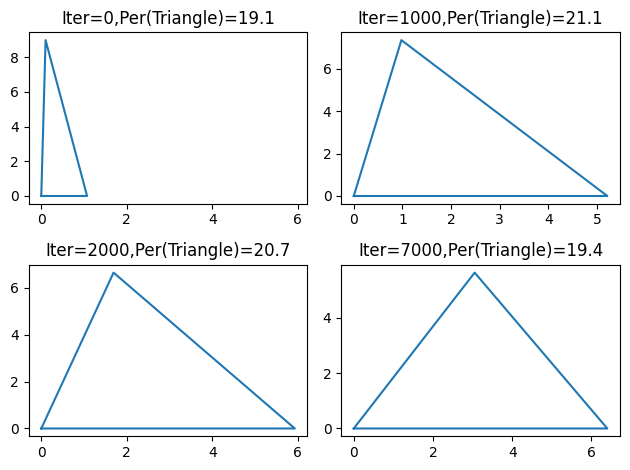

In [61]:
f=Rapport
grad=Grad
x0 = np.array([1,0.1,9]) #Initial triangle (far from one local minimum)
iterations = 7001
error_point = 1e-10
error_grad = 1e-10
h = 1e-3
result = steepest_descent_constant_step(f, grad, x0, iterations, error_point, error_grad, h)

In [62]:
from matplotlib.animation import FuncAnimation

In what follows we generate the gif showing the convergence of the triangle to the optimale one.

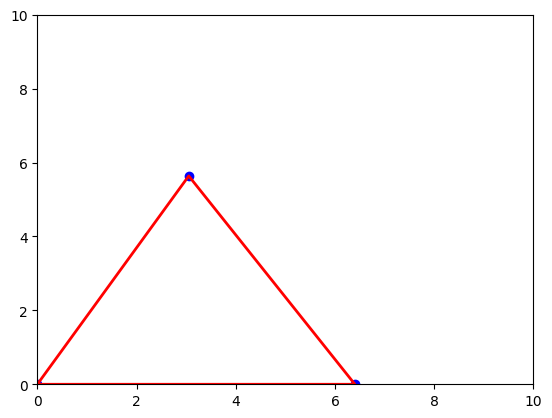

In [63]:
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
points, = ax.plot([], [], 'bo')
line, = ax.plot([], [], 'r-', lw=2)
def init():
    points.set_data([], [])
    line.set_data([], [])
    return points, line

def update(frame):
  x_coords = [p[0] for p in frame]
  y_coords = [p[1] for p in frame]
  x_coords.append(frame[0][0])
  y_coords.append(frame[0][1])
  points.set_data(x_coords[:-1], y_coords[:-1])
  line.set_data(x_coords, y_coords)
  return points, line
ani = FuncAnimation(fig, update, frames=result, init_func=init, blit=True)
ani.save("gradient_descent.gif", writer='imagemagick')
plt.show()